# Tarea 2

In [373]:
!pip install openpyxl

Importan bibliotecas necesarias para el procesamiento de la base de datos

In [374]:
# importa las bibliotecas Pandas, Numpy
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import re

Se lee la base de datos en un dataframe "df" 

In [375]:
ubicacion = "./datos/chile_earthquakes_1520-2024.tsv"

directorio_salida = "./salida/"

(OPCIONAL) Comprobar que los datos se cargaron correctamente mediante la visualización de las primeras 10 filas 

In [376]:
# Crea una lista con el encabezado
encabezado = ["Search Parameters",	"Year",	"Mo",	"Dy",	"Hr",	"Mn",	"Tsu",	"Country",	"Location Name",	"Latitude",	"Longitude",	"Focal Depth (km)",	"Mag",	"Deaths",	"Missing",	"Injuries",	"Damage ($Mil)",	"Houses Destroyed",	"Houses Damaged"]
df = pd.read_csv(ubicacion, sep='\t', names=encabezado)

Lista con el encabezado de las columnas de la base de datos

In [377]:
print("headers\n", encabezado)

headers
 ['Search Parameters', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Tsu', 'Country', 'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'Deaths', 'Missing', 'Injuries', 'Damage ($Mil)', 'Houses Destroyed', 'Houses Damaged']


(OPCIONAL) Comprobar que los encabezados se cargaron correctamente

In [378]:
df.head(10)

,Search Parameters,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,Search Parameters,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
1,"[""Region = 160 - South America"",""Country = CHI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1520,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1543,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
7,NaN,1604,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-29.9,-71.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1615,9,16,NaN,NaN,230,CHILE,CHILE: ARICA,-18.5,-70.35,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1633,5,14,NaN,NaN,246,CHILE,CHILE: FORT CARELMAPU,-41.8,-73.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminacion de fila innecesaria para el analisis de datos

In [379]:
# Elimina las filas 0 y 1
df = df.drop([0, 1])

In [380]:
# Reinicia los índices
df = df.reset_index(drop=True)
df.head(10)

,Search Parameters,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,NaN,1520,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1543,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
5,NaN,1604,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-29.9,-71.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1615,9,16,NaN,NaN,230,CHILE,CHILE: ARICA,-18.5,-70.35,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,1633,5,14,NaN,NaN,246,CHILE,CHILE: FORT CARELMAPU,-41.8,-73.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1639,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-30,-71.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1647,5,14,2,30,NaN,CHILE,CHILE: SANTIAGO,-33.4,-70.6,NaN,8.5,1000,NaN,NaN,NaN,300,NaN


In [381]:
df.tail()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
193,NaN,2019,1,20,1,32,NaN,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,NaN,NaN,NaN,NaN,1061
194,NaN,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,2019,9,26,16,36,NaN,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,NaN,NaN,NaN,NaN,NaN
196,NaN,2019,9,29,15,57,NaN,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,NaN,NaN,NaN,NaN,NaN
197,NaN,2020,12,27,21,39,5760,CHILE,CHILE: OFF COAST CENTRAL,-39.343,-74.99,10,6.7,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
# Elimina la columna "Search Parameters"
df = df.drop("Search Parameters", axis=1)

# Muestra el DataFrame actualizado
df.head(10)

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1543,NaN,NaN,NaN,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
5,1604,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-29.9,-71.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1615,9,16,NaN,NaN,230,CHILE,CHILE: ARICA,-18.5,-70.35,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN
7,1633,5,14,NaN,NaN,246,CHILE,CHILE: FORT CARELMAPU,-41.8,-73.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1639,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-30,-71.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1647,5,14,2,30,NaN,CHILE,CHILE: SANTIAGO,-33.4,-70.6,NaN,8.5,1000,NaN,NaN,NaN,300,NaN


In [383]:
df.tail()

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
193,2019,1,20,1,32,NaN,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,NaN,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,NaN,NaN,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,NaN,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,NaN,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,NaN,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,NaN,NaN,NaN,NaN,NaN
197,2020,12,27,21,39,5760,CHILE,CHILE: OFF COAST CENTRAL,-39.343,-74.99,10,6.7,NaN,NaN,NaN,NaN,NaN,NaN


Analisis basico de los datos de entrada

In [384]:
#Información y análisis estadístico
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              198 non-null    object
 1   Mo                195 non-null    object
 2   Dy                193 non-null    object
 3   Hr                151 non-null    object
 4   Mn                147 non-null    object
 5   Tsu               145 non-null    object
 6   Country           198 non-null    object
 7   Location Name     198 non-null    object
 8   Latitude          198 non-null    object
 9   Longitude         198 non-null    object
 10  Focal Depth (km)  110 non-null    object
 11  Mag               146 non-null    object
 12  Deaths            53 non-null     object
 13  Missing           2 non-null      object
 14  Injuries          23 non-null     object
 15  Damage ($Mil)     18 non-null     object
 16  Houses Destroyed  13 non-null     object
 17  Houses Damaged  

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
count,198,195,193,151,147,145,198,198,198,198,110,146,53,2,23,18,13,7
unique,123,12,31,24,52,145,1,89,133,104,46,33,26,2,20,16,13,7
top,1869,12,14,2,15,178,CHILE,CHILE: NORTHERN,-18.5,-71,33,7.5,1,30,200,100,300,15700
freq,6,25,14,11,10,1,198,23,7,16,22,11,13,1,2,2,1,1


In [385]:
# Dimensión del dataframe (rows, columns)
df.shape

(198, 18)

In [386]:
datos_faltantes = df.isnull()
datos_faltantes.head(10)

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,False,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,True,True,True
3,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True
5,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True
6,False,False,False,True,True,False,False,False,False,False,True,False,True,True,True,True,True,True
7,False,False,False,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True
8,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True
9,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,False,True


In [387]:
for columna in datos_faltantes.columns.values.tolist():
    print('columna:',columna)
    print (datos_faltantes[columna].value_counts())
    print("")

columna: Year
Year
False    198
Name: count, dtype: int64

columna: Mo
Mo
False    195
True       3
Name: count, dtype: int64

columna: Dy
Dy
False    193
True       5
Name: count, dtype: int64

columna: Hr
Hr
False    151
True      47
Name: count, dtype: int64

columna: Mn
Mn
False    147
True      51
Name: count, dtype: int64

columna: Tsu
Tsu
False    145
True      53
Name: count, dtype: int64

columna: Country
Country
False    198
Name: count, dtype: int64

columna: Location Name
Location Name
False    198
Name: count, dtype: int64

columna: Latitude
Latitude
False    198
Name: count, dtype: int64

columna: Longitude
Longitude
False    198
Name: count, dtype: int64

columna: Focal Depth (km)
Focal Depth (km)
False    110
True      88
Name: count, dtype: int64

columna: Mag
Mag
False    146
True      52
Name: count, dtype: int64

columna: Deaths
Deaths
True     145
False     53
Name: count, dtype: int64

columna: Missing
Missing
True     196
False      2
Name: count, dtype: int64

c

In [388]:
#Cantidad de valores faltantes en cada columna
df.isnull().sum()

Year                  0
Mo                    3
Dy                    5
Hr                   47
Mn                   51
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64

Manipulacion de valores faltantes: Reemplazando por su promedio.

In [389]:
# Calcula la frecuencia de la columna "Mo"
df['Mo'].value_counts().idxmax()

'12'

In [390]:
# Reemplaza los valores faltantes en la columna "Mo" por su frecuencia
df["Mo"].replace(np.nan, 12, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())

df

Year                  0
Mo                    0
Dy                    5
Hr                   47
Mn                   51
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_13956\2235646562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mo"].replace(np.nan, 12, inplace=True)


,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1543,12,NaN,NaN,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,NaN,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,NaN,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,NaN,NaN,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,NaN,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,NaN,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,NaN,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,NaN,NaN,NaN,NaN,NaN


In [391]:
# Calcula la frecuencia de la columna "Dy"
df['Dy'].value_counts().idxmax()

'14'

In [392]:
# Reemplaza los valores faltantes en la columna "Mo" por su frecuencia
df["Dy"].replace(np.nan, 14, inplace=True)
# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())

Year                  0
Mo                    0
Dy                    0
Hr                   47
Mn                   51
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_13956\1660238518.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Dy"].replace(np.nan, 14, inplace=True)


In [393]:
df

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,12,14,NaN,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1543,12,14,NaN,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,NaN,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,NaN,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,NaN,NaN,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,NaN,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,NaN,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,NaN,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,NaN,NaN,NaN,NaN,NaN


In [394]:
# Calcula la frecuencia de la columna "Hr"
df['Hr'].value_counts().idxmax()

'2'

In [395]:
# Reemplaza los valores faltantes en la columna "Hr" por su frecuencia
df["Hr"].replace(np.nan, 12, inplace=True)
# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                   51
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_13956\2577328327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hr"].replace(np.nan, 12, inplace=True)


,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,12,14,12,NaN,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1543,12,14,12,NaN,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1562,10,28,10,NaN,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,2,8,13,NaN,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,NaN,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,NaN,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,NaN,NaN,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,NaN,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,NaN,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,NaN,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,NaN,NaN,NaN,NaN,NaN


In [396]:
# Calcula la frecuencia de la columna "Mn"
df['Mn'].value_counts().idxmax()

'15'

In [397]:
# Reemplaza los valores faltantes en la columna "Mn" por su frecuencia
df["Mn"].replace(np.nan, 15, inplace=True)
# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())


Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                    0
Tsu                  53
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths              145
Missing             196
Injuries            175
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_13956\9730683.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mn"].replace(np.nan, 15, inplace=True)


In [398]:
df

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,12,14,12,15,NaN,CHILE,CHILE,-40,-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1543,12,14,12,15,NaN,CHILE,CHILE,-19,-70.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1562,10,28,10,15,178,CHILE,CHILE,-38.7,-73.5,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,2,8,13,15,179,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1575,12,16,18,30,185,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,NaN,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,NaN,NaN,NaN,NaN,1061
194,2019,6,14,0,19,5710,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,NaN,NaN,NaN,NaN,NaN,NaN
195,2019,9,26,16,36,NaN,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,NaN,NaN,NaN,NaN,NaN
196,2019,9,29,15,57,NaN,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,NaN,NaN,NaN,NaN,NaN


In [399]:
# Reemplaza los valores faltantes en la columna "Tsu", "Deaths", "Missing" e "Injuries" por 0
df["Tsu"].fillna(0, inplace=True)
df["Deaths"].fillna(0, inplace=True)
df["Missing"].fillna(0, inplace=True)
df["Injuries"].fillna(0, inplace=True)

#Reemplaza los valores distintos de 0 por 1
df.loc[df['Tsu'] != 0, 'Tsu'] = 1

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                    0
Tsu                   0
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)     88
Mag                  52
Deaths                0
Missing               0
Injuries              0
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_13956\2246285537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tsu"].fillna(0, inplace=True)
C:\Users\realx\AppData\Local\Temp\ipykernel_13956\2246285537.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,12,14,12,15,0,CHILE,CHILE,-40,-74,NaN,NaN,0,0,0,NaN,NaN,NaN
1,1543,12,14,12,15,0,CHILE,CHILE,-19,-70.5,NaN,NaN,0,0,0,NaN,NaN,NaN
2,1562,10,28,10,15,1,CHILE,CHILE,-38.7,-73.5,NaN,8,0,0,0,NaN,NaN,NaN
3,1570,2,8,13,15,1,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,NaN,8.3,0,0,0,NaN,NaN,NaN
4,1575,12,16,18,30,1,CHILE,CHILE: VALDIVIA,-39.8,-73.2,NaN,8.5,21,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,0,0,NaN,NaN,1061
194,2019,6,14,0,19,1,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,0,NaN,NaN,NaN
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,0,NaN,NaN,NaN
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,0,NaN,NaN,NaN


In [400]:
# Calcula el promedio de la columna "Focal Depth (km)"
Focal_depth_prom = df["Focal Depth (km)"].astype("float").mean(axis=0)

# Redondea el promedio al entero más cercano
Focal_depth_prom_entero = int(round(Focal_depth_prom))

# Reemplaza los valores faltantes en la columna "Focal Depth (km)" por su promedio entero
df["Focal Depth (km)"].fillna(Focal_depth_prom_entero, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                    0
Tsu                   0
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)      0
Mag                  52
Deaths                0
Missing               0
Injuries              0
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_13956\3777551861.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Focal Depth (km)"].fillna(Focal_depth_prom_entero, inplace=True)


,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,12,14,12,15,0,CHILE,CHILE,-40,-74,43,NaN,0,0,0,NaN,NaN,NaN
1,1543,12,14,12,15,0,CHILE,CHILE,-19,-70.5,43,NaN,0,0,0,NaN,NaN,NaN
2,1562,10,28,10,15,1,CHILE,CHILE,-38.7,-73.5,43,8,0,0,0,NaN,NaN,NaN
3,1570,2,8,13,15,1,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,43,8.3,0,0,0,NaN,NaN,NaN
4,1575,12,16,18,30,1,CHILE,CHILE: VALDIVIA,-39.8,-73.2,43,8.5,21,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,0,0,NaN,NaN,1061
194,2019,6,14,0,19,1,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,0,NaN,NaN,NaN
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,0,NaN,NaN,NaN
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,0,NaN,NaN,NaN


In [401]:
# Calcula el promedio de la columna "Mag"
Mag_prom = df["Mag"].astype("float").mean(axis=0)

# Reemplaza los valores faltantes en la columna "Mag" por el promedio con un decimal
df["Mag"].fillna(round(Mag_prom, 1), inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

Year                  0
Mo                    0
Dy                    0
Hr                    0
Mn                    0
Tsu                   0
Country               0
Location Name         0
Latitude              0
Longitude             0
Focal Depth (km)      0
Mag                   0
Deaths                0
Missing               0
Injuries              0
Damage ($Mil)       180
Houses Destroyed    185
Houses Damaged      191
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_13956\440714913.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mag"].fillna(round(Mag_prom, 1), inplace=True)


,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,12,14,12,15,0,CHILE,CHILE,-40,-74,43,7.2,0,0,0,NaN,NaN,NaN
1,1543,12,14,12,15,0,CHILE,CHILE,-19,-70.5,43,7.2,0,0,0,NaN,NaN,NaN
2,1562,10,28,10,15,1,CHILE,CHILE,-38.7,-73.5,43,8,0,0,0,NaN,NaN,NaN
3,1570,2,8,13,15,1,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,43,8.3,0,0,0,NaN,NaN,NaN
4,1575,12,16,18,30,1,CHILE,CHILE: VALDIVIA,-39.8,-73.2,43,8.5,21,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,0,0,NaN,NaN,1061
194,2019,6,14,0,19,1,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,0,NaN,NaN,NaN
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,0,NaN,NaN,NaN
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,0,NaN,NaN,NaN


In [402]:
# Calcula el promedio para "Damage ($Mil)"
damage_prom = df["Damage ($Mil)"].astype("float").mean(axis=0)
# Redondea el promedio al entero más cercano
damage_prom_entero = int(round(damage_prom))
# Reemplaza los valores faltantes en "Damage ($Mil)" por el promedio entero
df["Damage ($Mil)"].fillna(damage_prom_entero, inplace=True)

# Calcula el promedio para "Houses Destroyed"
destroyed_prom = df["Houses Destroyed"].astype("float").mean(axis=0)
# Redondea el promedio al entero más cercano
destroyed_prom_entero = int(round(destroyed_prom))
# Reemplaza los valores faltantes en "Houses Destroyed" por el promedio entero
df["Houses Destroyed"].fillna(destroyed_prom_entero, inplace=True)

# Calcula el promedio para "Houses Damaged"
damaged_prom = df["Houses Damaged"].astype("float").mean(axis=0)
# Redondea el promedio al entero más cercano
damaged_prom_entero = int(round(damaged_prom))
# Reemplaza los valores faltantes en "Houses Damaged" por el promedio entero
df["Houses Damaged"].fillna(damaged_prom_entero, inplace=True)

# Cantidad actualizada de valores faltantes en cada columna
print(df.isnull().sum())
df

Year                0
Mo                  0
Dy                  0
Hr                  0
Mn                  0
Tsu                 0
Country             0
Location Name       0
Latitude            0
Longitude           0
Focal Depth (km)    0
Mag                 0
Deaths              0
Missing             0
Injuries            0
Damage ($Mil)       0
Houses Destroyed    0
Houses Damaged      0
dtype: int64


C:\Users\realx\AppData\Local\Temp\ipykernel_13956\2299482699.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Damage ($Mil)"].fillna(damage_prom_entero, inplace=True)
C:\Users\realx\AppData\Local\Temp\ipykernel_13956\2299482699.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,12,14,12,15,0,CHILE,CHILE,-40,-74,43,7.2,0,0,0,1952,5309,75712
1,1543,12,14,12,15,0,CHILE,CHILE,-19,-70.5,43,7.2,0,0,0,1952,5309,75712
2,1562,10,28,10,15,1,CHILE,CHILE,-38.7,-73.5,43,8,0,0,0,1952,5309,75712
3,1570,2,8,13,15,1,CHILE,CHILE: OLD CONCEPCION,-36.75,-73,43,8.3,0,0,0,1952,5309,75712
4,1575,12,16,18,30,1,CHILE,CHILE: VALDIVIA,-39.8,-73.2,43,8.5,21,0,0,1952,5309,75712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.04,-71.382,63,6.7,2,0,0,1952,5309,1061
194,2019,6,14,0,19,1,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,0,1952,5309,75712
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,0,1952,5309,75712
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,0,1952,5309,75712


Estandarizar datos de entrada.

In [403]:
columnas_numericas = ['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Tsu', 'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'Deaths', 'Missing', 'Injuries', 'Damage ($Mil)', 'Houses Destroyed', 'Houses Damaged']
print(df[columnas_numericas].dtypes)

Year                object
Mo                  object
Dy                  object
Hr                  object
Mn                  object
Tsu                 object
Latitude            object
Longitude           object
Focal Depth (km)    object
Mag                 object
Deaths              object
Missing             object
Injuries            object
Damage ($Mil)       object
Houses Destroyed    object
Houses Damaged      object
dtype: object


In [404]:
# Convertir columnas a tipo numérico
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Verificar los tipos de datos después de la conversión
print(df[columnas_numericas].dtypes)

Year                  int64
Mo                    int64
Dy                    int64
Hr                    int64
Mn                    int64
Tsu                   int64
Latitude            float64
Longitude           float64
Focal Depth (km)      int64
Mag                 float64
Deaths                int64
Missing               int64
Injuries              int64
Damage ($Mil)       float64
Houses Destroyed      int64
Houses Damaged        int64
dtype: object


Agrupar datos de entrada.

In [405]:
# Agrupar por año y calcular el promedio de la magnitud de los terremotos
promedio_magnitud_por_año = df.groupby('Year')['Mag'].mean()

# Imprimir los resultados
print(promedio_magnitud_por_año)
df

Year
1520    7.20
1543    7.20
1562    8.00
1570    8.30
1575    8.50
        ... 
2015    7.60
2016    7.60
2017    6.15
2019    6.50
2020    6.70
Name: Mag, Length: 123, dtype: float64


,Year,Mo,Dy,Hr,Mn,Tsu,Country,Location Name,Latitude,Longitude,Focal Depth (km),Mag,Deaths,Missing,Injuries,Damage ($Mil),Houses Destroyed,Houses Damaged
0,1520,12,14,12,15,0,CHILE,CHILE,-40.000,-74.000,43,7.2,0,0,0,1952.0,5309,75712
1,1543,12,14,12,15,0,CHILE,CHILE,-19.000,-70.500,43,7.2,0,0,0,1952.0,5309,75712
2,1562,10,28,10,15,1,CHILE,CHILE,-38.700,-73.500,43,8.0,0,0,0,1952.0,5309,75712
3,1570,2,8,13,15,1,CHILE,CHILE: OLD CONCEPCION,-36.750,-73.000,43,8.3,0,0,0,1952.0,5309,75712
4,1575,12,16,18,30,1,CHILE,CHILE: VALDIVIA,-39.800,-73.200,43,8.5,21,0,0,1952.0,5309,75712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019,1,20,1,32,0,CHILE,"CHILE: COQUIMBO, LA SERENA",-30.040,-71.382,63,6.7,2,0,0,1952.0,5309,1061
194,2019,6,14,0,19,1,CHILE,CHILE: COQUIMBO,-30.056,-72.082,11,6.4,0,0,0,1952.0,5309,75712
195,2019,9,26,16,36,0,CHILE,CHILE: SOUTH CENTRAL,-40.815,-72.002,129,6.1,1,0,0,1952.0,5309,75712
196,2019,9,29,15,57,0,CHILE,CHILE: CONCEPCION,-35.473,-73.162,11,6.8,1,0,0,1952.0,5309,75712


In [406]:
# Guardar como archivo CSV en el directorio de salida
df.to_csv('salida/datos_procesados.csv', index=False)

# Guardar como archivo TSV en el directorio de salida
df.to_csv('salida/datos_procesados.tsv', sep='\t', index=False)

#!pip install tables
# Guardar como archivo Excel en el directorio de salida
#df.to_excel('salida/datos_procesados.xlsx', index=False)

# Guardar como archivo HDF5 en el directorio de salida
#df.to_hdf('salida/datos_procesados.h5', key='df', mode='w')

# Guardar como archivo pickle de Python en el directorio de salida
#df.to_pickle('salida/datos_procesados.pkl')

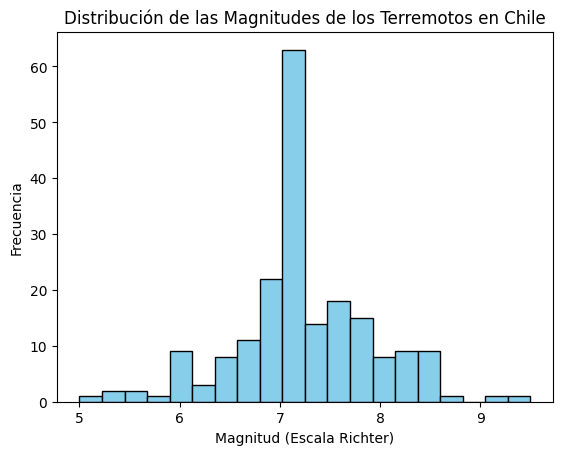

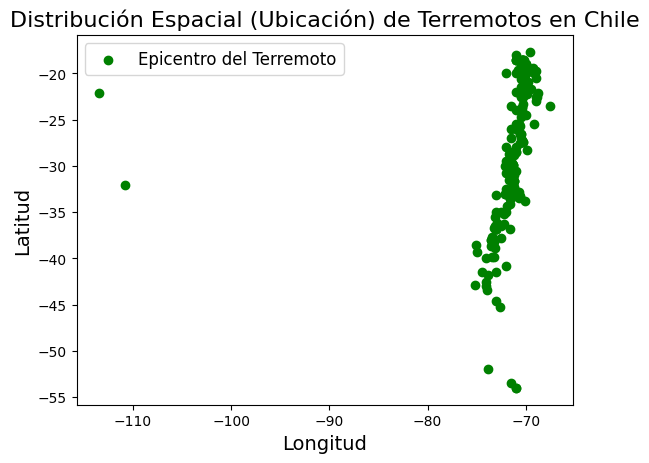

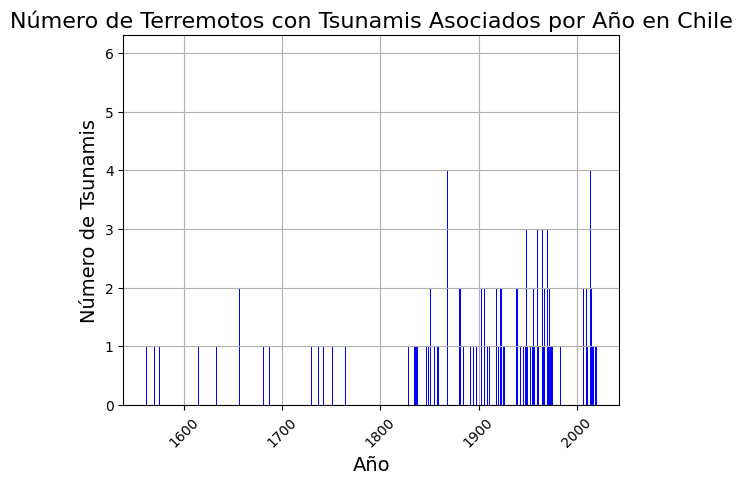

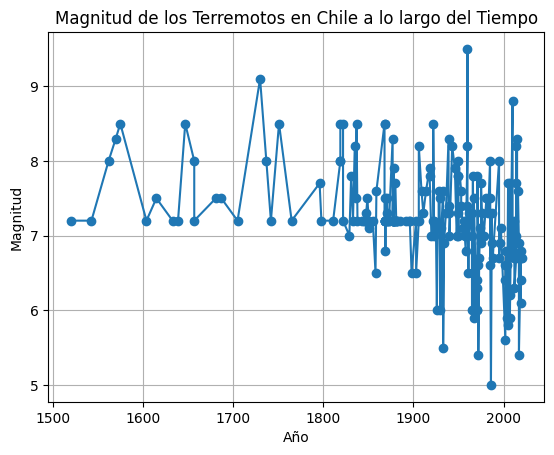

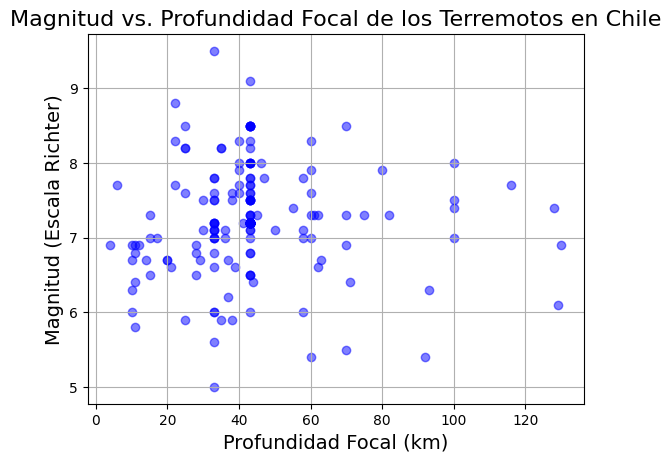

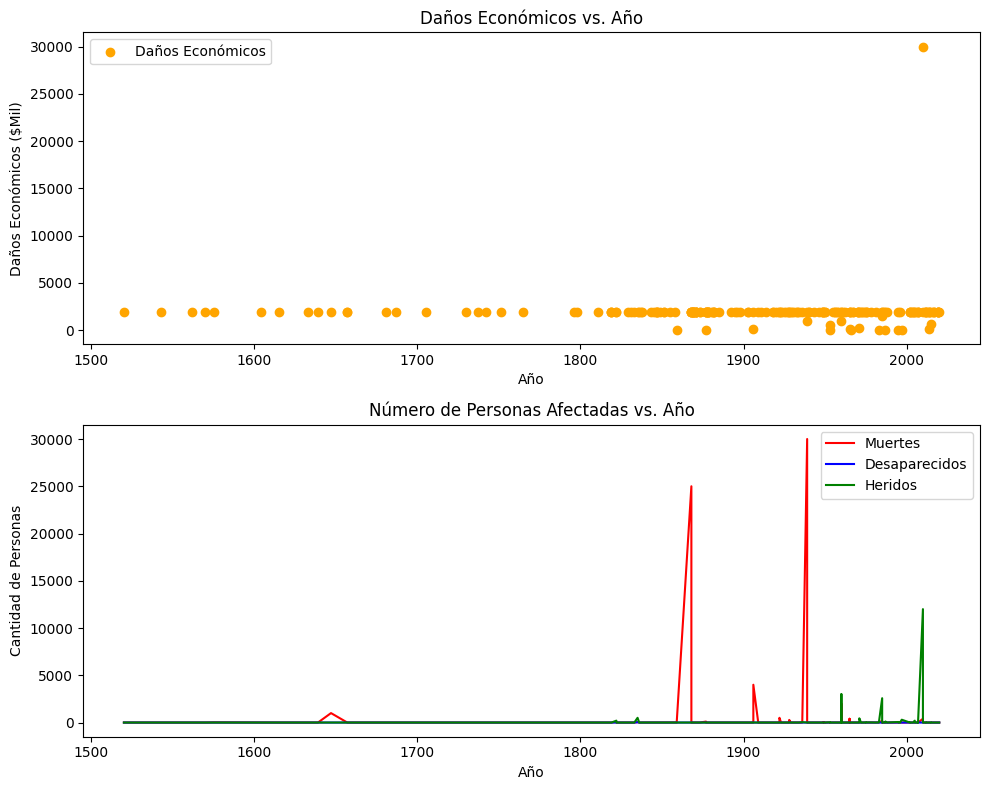

In [407]:
import matplotlib.backends.backend_pdf

# Creamos un objeto para el PDF
pdf = matplotlib.backends.backend_pdf.PdfPages("salida/graficos_chile_earthquakes.pdf")

# Gráfico 1: Histograma de Magnitudes
plt.hist(df['Mag'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Magnitud (Escala Richter)')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Magnitudes de los Terremotos en Chile')
pdf.savefig()  # Guardamos este gráfico en el PDF
pdf.close()
# Gráfico 2: Dispersión de Latitud y Longitud
plt.figure()  # Creamos una nueva figura para el siguiente gráfico
plt.scatter(df['Longitude'], df['Latitude'], color='green', label='Epicentro del Terremoto')
plt.title('Distribución Espacial (Ubicación) de Terremotos en Chile', fontsize=16)
plt.xlabel('Longitud', fontsize=14)
plt.ylabel('Latitud', fontsize=14)
plt.legend(fontsize=12)
pdf.savefig()  # Guardamos este gráfico en el PDF

# Gráfico 3: Barras de Tsunamis por Año
tsunami_events = df[df['Tsu'] != 0]  # Filtrar los eventos de tsunami
tsunami_count_by_year = tsunami_events.groupby('Year')['Tsu'].count()
plt.figure()  # Creamos una nueva figura para el siguiente gráfico
plt.bar(tsunami_count_by_year.index, tsunami_count_by_year.values, color='blue')
plt.title('Número de Terremotos con Tsunamis Asociados por Año en Chile', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Tsunamis', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
pdf.savefig()  # Guardamos este gráfico en el PDF

# Gráfico 4: Línea de Magnitud vs. Año
plt.figure()  # Creamos una nueva figura para el siguiente gráfico
plt.plot(df['Year'], df['Mag'], marker='o', linestyle='-')
plt.title('Magnitud de los Terremotos en Chile a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Magnitud')
plt.grid(True)
pdf.savefig()  # Guardamos este gráfico en el PDF

# Gráfico 5: Dispersión de Magnitud vs. Profundidad Focal
plt.figure()  # Creamos una nueva figura para el siguiente gráfico
plt.scatter(df['Focal Depth (km)'], df['Mag'], color='blue', alpha=0.5)
plt.title('Magnitud vs. Profundidad Focal de los Terremotos en Chile', fontsize=16)
plt.xlabel('Profundidad Focal (km)', fontsize=14)
plt.ylabel('Magnitud (Escala Richter)', fontsize=14)
plt.grid(True)
pdf.savefig()  # Guardamos este gráfico en el PDF

# Gráfico 6: Subgráfico de Daños Económicos vs. Año y Personas Afectadas vs. Año
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.scatter(df['Year'], df['Damage ($Mil)'], color='orange', label='Daños Económicos')
ax1.set_title('Daños Económicos vs. Año')
ax1.set_xlabel('Año')
ax1.set_ylabel('Daños Económicos ($Mil)')
ax1.legend()
ax2.plot(df['Year'], df['Deaths'], color='red', label='Muertes')
ax2.plot(df['Year'], df['Missing'], color='blue', label='Desaparecidos')
ax2.plot(df['Year'], df['Injuries'], color='green', label='Heridos')
ax2.set_title('Número de Personas Afectadas vs. Año')
ax2.set_xlabel('Año')
ax2.set_ylabel('Cantidad de Personas')
ax2.legend()
plt.tight_layout()
pdf.savefig()  # Guardamos este gráfico en el PDF

# Cerramos el PDF
pdf.close()


In [408]:

# Gráfico 2: Dispersión de Latitud y Longitud
plt.figure(figsize=(8, 6))  # Definir tamaño del gráfico
plt.scatter(df['Longitude'], df['Latitude'], color='green', label='Epicentro del Terremoto')
plt.title('Distribución Espacial (Ubicación) de Terremotos en Chile', fontsize=16)  # Agregar título
plt.xlabel('Longitud', fontsize=14)  # Agregar etiqueta al eje x
plt.ylabel('Latitud', fontsize=14)  # Agregar etiqueta al eje y
plt.legend(fontsize=12)  # Crear leyenda
pdf.savefig()  # Guardamos este gráfico en el PDF
plt.close()


C:\Users\realx\AppData\Local\Temp\ipykernel_13956\1854938096.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Mo', y='Mag', data=df, inner='point', palette='muted')


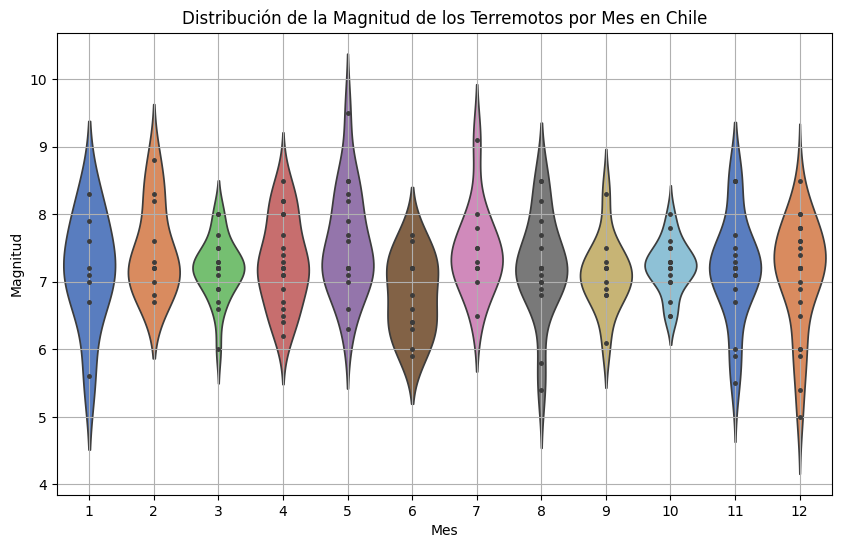

In [409]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Mo', y='Mag', data=df, inner='point', palette='muted')
plt.title('Distribución de la Magnitud de los Terremotos por Mes en Chile')
plt.xlabel('Mes')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()


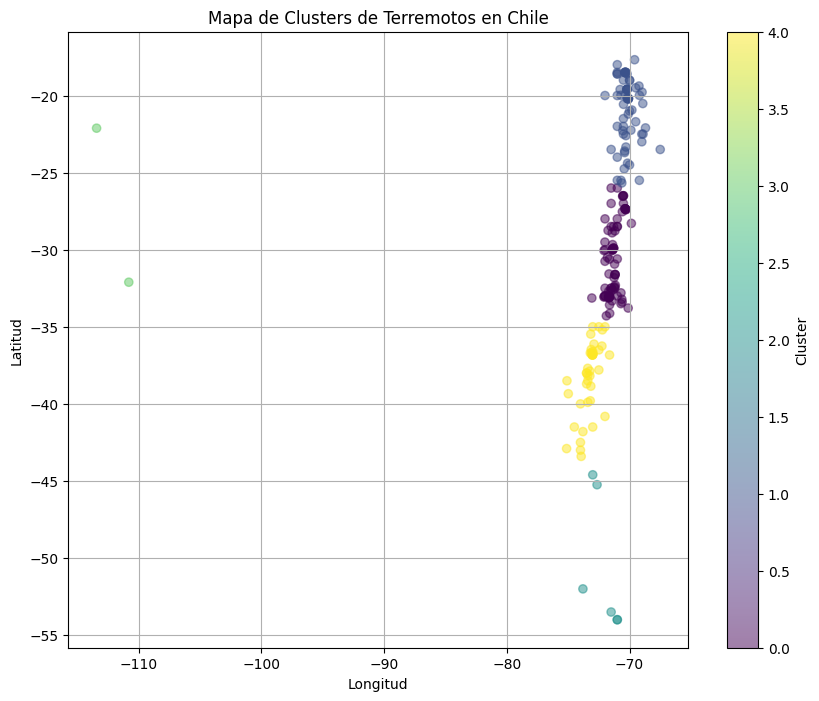

In [410]:
#!pip install scikit-learn
from sklearn.cluster import KMeans

X = df[['Latitude', 'Longitude']]

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Mapa de Clusters de Terremotos en Chile')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


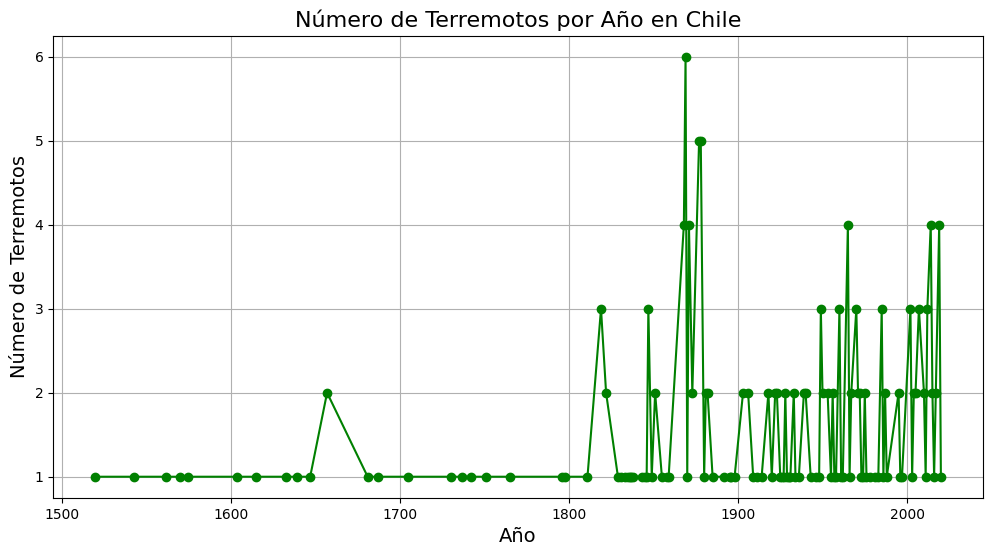

In [411]:
earthquake_count_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(earthquake_count_by_year.index, earthquake_count_by_year.values, color='green', marker='o')
plt.title('Número de Terremotos por Año en Chile', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Terremotos', fontsize=14)
plt.grid(True)
plt.show()


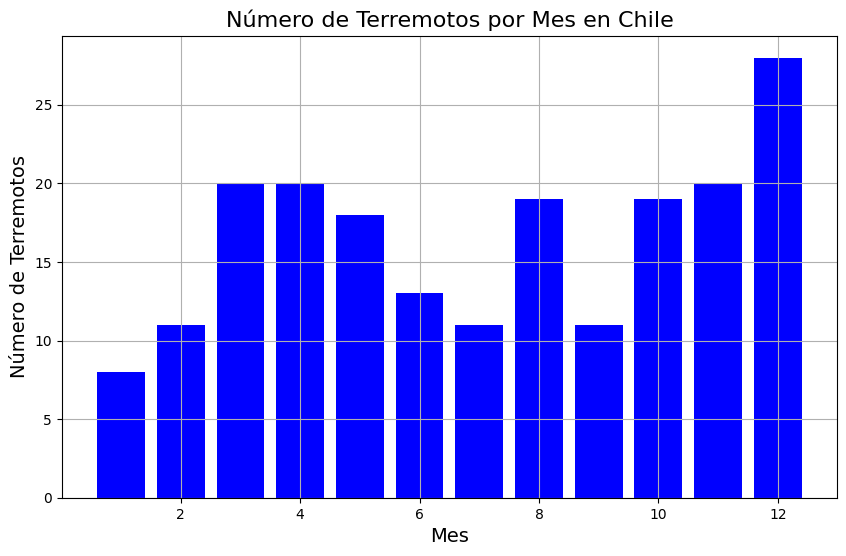

In [412]:
earthquake_count_by_month = df['Mo'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(earthquake_count_by_month.index, earthquake_count_by_month.values, color='blue')
plt.title('Número de Terremotos por Mes en Chile', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Número de Terremotos', fontsize=14)
plt.grid(True)
plt.show()


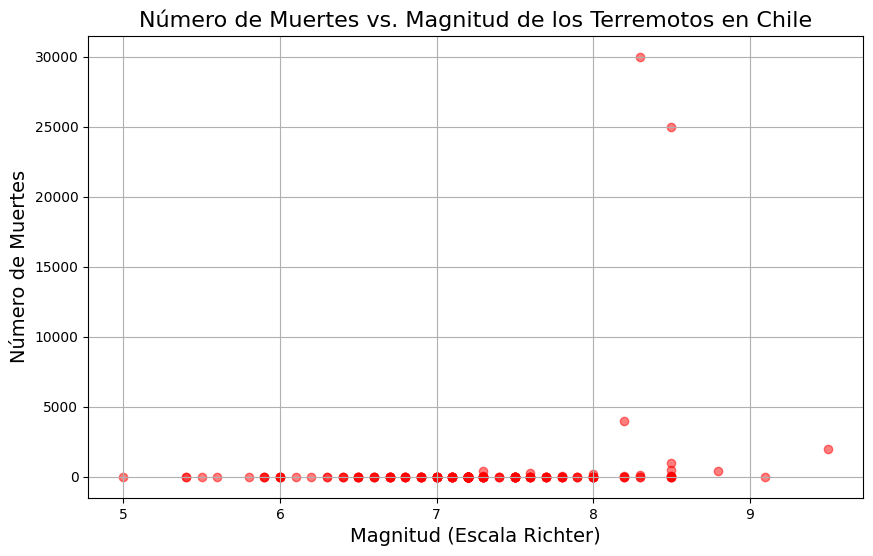

In [413]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Mag'], df['Deaths'], color='red', alpha=0.5)
plt.title('Número de Muertes vs. Magnitud de los Terremotos en Chile', fontsize=16)
plt.xlabel('Magnitud (Escala Richter)', fontsize=14)
plt.ylabel('Número de Muertes', fontsize=14)
plt.grid(True)
plt.show()


In [414]:
houses_destroyed_by_region = df.groupby('Location Name')['Houses Destroyed'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 15))
houses_destroyed_by_region.plot(kind='barh', color='green')
plt.title('Número de Casas Destruídas por Región en Chile', fontsize=16)
plt.xlabel('Número de Casas Destruídas', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.grid(True)
plt.show()
